# GRMDS NFT Dataset Analysis
Submission by Team Kebab

## Importing Data and Modules

In [ ]:
# Data Analysis
import numpy as np
import pandas as pd

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

In [ ]:
assets = pd.read_csv('https://raw.githubusercontent.com/kevinbennetth/GRMDS-NFT-Competition/main/raw-datasets/Assets.csv')
collections = pd.read_csv('https://raw.githubusercontent.com/kevinbennetth/GRMDS-NFT-Competition/main/raw-datasets/Collections.csv')
events = pd.read_csv('https://raw.githubusercontent.com/kevinbennetth/GRMDS-NFT-Competition/main/raw-datasets/events.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Understanding the Data


This section will discuss about the data, we will explain our understandings when first looking at the dataset given, also addressing several necessary concerns.

### Assets Data

Firstly, we will take a look at the Assets dataset.

In [ ]:
assets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16550 entries, 0 to 16549
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   token_id                                    16549 non-null  object 
 1   asset_contract_address                      16549 non-null  object 
 2   owner_address                               16549 non-null  object 
 3   collection_slug                             16549 non-null  object 
 4   last_sale_payment_token_id                  8193 non-null   float64
 5   last_sale_payment_token_symbol              8193 non-null   object 
 6   last_sale_payment_token_address             8193 non-null   object 
 7   last_sale_payment_token_name                8193 non-null   object 
 8   last_sale_payment_token_eth_price           8193 non-null   float64
 9   last_sale_payment_token_usd_price           8193 non-null   float64
 10  last_sale_

There are a lot of null values exist within the dataset, but judging by their column labels, it indicates an event that had not yet happen leading to no data recorded (e.g. transaction never happened for a certain NFT asset, therefore no record for sales transaction).

In a glance, some columns have unsuitable data type, for example `last_sale_event_timestamp`, `is_presale`, etc. We will transform the data type of some of the columns.

To know what columns that would be necessary for analysis, let's look at some of the data.

In [ ]:
pd.set_option("display.max_columns", None)
assets.head()

,token_id,asset_contract_address,owner_address,collection_slug,last_sale_payment_token_id,last_sale_payment_token_symbol,last_sale_payment_token_address,last_sale_payment_token_name,last_sale_payment_token_eth_price,last_sale_payment_token_usd_price,last_sale_transaction_from_account_address,last_sale_transaction_id,last_sale_transaction_timestamp,last_sale_transaction_to_account_address,last_sale_event_timestamp,last_sale_total_price,last_sale_created_date,last_sale_quantity,is_presale,traits,name,num_sales,image_url,description,asset_contract_type,asset_contract_created_date,asset_contract_name,asset_contract_owner,asset_contract_dev_seller_fee_basis_points,asset_favorites,asset_category
0,1041544390811223925548137112510456274926830839...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,spiritman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'trait_type': 'smile', 'value': 'laughing', ...",#3365,0.0,https://lh3.googleusercontent.com/pUDYH7EnULJc...,NaN,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,4,art
1,3408548560580985823464505673624610083362790836...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,byteosaurus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'trait_type': 'background', 'value': 'pink',...",Byteosaurus #8403,0.0,https://lh3.googleusercontent.com/NixgIufh8tt9...,NaN,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,1,art
2,2344366250094683526428341084644309510528416437...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,crypto-totem-nft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,[],crypto-totem#3597,0.0,https://lh3.googleusercontent.com/F7JUs4kn5gfm...,Crypto totem is a collection of 5555 totems cr...,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,7,art
3,3038784457613480191389558437600275577887949373...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,ultrapunks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'trait_type': 'Gender', 'value': 'Male', 'di...",UltraPunk #3167,0.0,https://lh3.googleusercontent.com/pUq0zWz_C1tn...,Ultra Cyberpunk right now,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,2,art
4,6996,0x417737d49a175d62625154262d8569d3890425ae,0x02e49aaddeca1b6b27edd1f5f43b5ed3e2be12ce,whaletogether,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2657.88,0x02e49aaddeca1b6b27edd1f5f43b5ed3e2be12ce,270300526.0,2022-02-08T11:14:13,0x0a267cf51ef038fc00e71801f5a524aec06e4f07,2022-02-08T11:14:13,120000000000000000,2022-02-08T11:14:42.037623,1.0,False,"[{'trait_type': 'Background', 'value': 'Solid ...",AlphieWhale #6996,1.0,https://lh3.googleusercontent.com/ndXzObLk0INB...,Alphie is the friendly alpha whale for the lit...,non-fungible,2022-02-02T08:11:36.815197,AlphieWhales,242350928.0,750.0,1,art


Upon further inspection, we think that some columns does not contain useful information for the purpose of our analysis. These include:
- `description`
- `traits`
- `image_url`

We will drop these columns. Overall, the assets data contains all information about a certain NFT asset in the OpenSea platform.

### Events Data

Next, let's take a look at the events data.

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87404 entries, 0 to 87403
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   asset_token_id                    87404 non-null  object 
 1   asset_contract_address            87404 non-null  object 
 2   asset_owner_address               87404 non-null  object 
 3   asset_owner_user                  78076 non-null  object 
 4   collection_slug                   87404 non-null  object 
 5   created_date                      87404 non-null  object 
 6   id                                87404 non-null  int64  
 7   quantity                          87351 non-null  float64
 8   listing_time                      58756 non-null  object 
 9   event_type                        87404 non-null  object 
 10  total_price                       19614 non-null  object 
 11  auction_type                      41792 non-null  object 
 12  dura

At a glance, the events dataset contains information about a transaction happening in the OpenSea platform. Transactions which include creating new NFT, opening an auction, bidding, transferring of ownership, etc. as seen from the column `event_type` below.

In [ ]:
events['event_type'].unique()

array(['created', 'transfer', 'successful', 'offer_entered',
       'bid_entered', 'cancelled', 'bid_withdrawn', 'approve'],
      dtype=object)

Looking at the available columns, there are some null values, similar to the assets data, some null values might exist because of non-occuring event yet to happen. But some are also questionable in terms of why there are null values.

In [ ]:
events.head()

,asset_token_id,asset_contract_address,asset_owner_address,asset_owner_user,collection_slug,created_date,id,quantity,listing_time,event_type,total_price,auction_type,duration,ending_price,starting_price,is_private,transaction_from_account_address,transaction_to_account_address,from_account_address,to_account_address
0,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,-persona,2022-02-26T22:36:39.940781,3707623152,1.0,2022-02-26T22:36:33,created,NaN,dutch,744355.0,150000000000000000,150000000000000000,False,NaN,NaN,0xd567941697e29e458b0cd46ef5d147fc653f546a,0xd567941697e29e458b0cd46ef5d147fc653f546a
1,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,-persona,2022-02-05T13:24:04.330138,3280041145,1.0,2022-02-05T13:21:00,created,NaN,dutch,2592088.0,150000000000000000,150000000000000000,False,NaN,NaN,0xd567941697e29e458b0cd46ef5d147fc653f546a,NaN
2,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,-persona,2022-02-05T13:22:43.723328,3280022640,1.0,2022-02-05T13:20:53,created,NaN,dutch,604895.0,150000000000000000,150000000000000000,False,NaN,NaN,0xd567941697e29e458b0cd46ef5d147fc653f546a,NaN
3,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,-persona,2022-02-02T13:58:26.564868,3222798752,1.0,NaN,transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x0000000000000000000000000000000000000000,NaN
4,5108264144382047380331840980799559675300158545...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,NullAddress,ibinola,2022-03-05T23:39:29.367868,3889292601,1.0,2022-03-05T23:37:27,created,NaN,dutch,557675.0,70000000000000000,70000000000000000,False,0x911bf7f46044addd684f84fd4b15b8309ca3fa79,0x7f268357a8c2552623316e2562d90e642bb538e5,0x911bf7f46044addd684f84fd4b15b8309ca3fa79,0x911bf7f46044addd684f84fd4b15b8309ca3fa79


By inspecting further, we decided that no columns should be dropped since all of them contains necessary informations for insight gathering. Some columns' data type might need to be transformed, and the reason of null values will be discussed further in the EDA section as we decided that we won't be dropping any rows either.

### Collections Data

Lastly, let's have a look at the collections dataset

In [ ]:
collections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 46 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   primary_asset_contracts_address                      962 non-null    object 
 1   primary_asset_contracts_asset_contract_type          962 non-null    object 
 2   primary_asset_contracts_created_date                 962 non-null    object 
 3   primary_asset_contracts_name                         961 non-null    object 
 4   primary_asset_contracts_nft_version                  870 non-null    object 
 5   primary_asset_contracts_owner                        909 non-null    float64
 6   primary_asset_contracts_schema_name                  962 non-null    object 
 7   primary_asset_contracts_symbol                       894 non-null    object 
 8   primary_asset_contracts_total_supply                 772 non-null   

Similar to the assets data, collections data have unecessary columns that needs to be dropped and some needs to be transformed. Unecessary columns include:
- `stats_time`
- `description`
- `primary_asset_contracts_description`
- `discord_url`
- `instagram_username`
- `telegram_url`
- `twitter_username`
- `medium_username`
- `external_url`

Which were determined after looking at a few samples from the dataset below.

In [ ]:
collections.head()

,primary_asset_contracts_address,primary_asset_contracts_asset_contract_type,primary_asset_contracts_created_date,primary_asset_contracts_name,primary_asset_contracts_nft_version,primary_asset_contracts_owner,primary_asset_contracts_schema_name,primary_asset_contracts_symbol,primary_asset_contracts_total_supply,primary_asset_contracts_description,primary_asset_contracts_dev_seller_fee_basis_points,primary_asset_contracts_seller_fee_basis_points,primary_asset_contracts_payout_address,stats_one_day_volume,stats_one_day_change,stats_one_day_sales,stats_one_day_average_price,stats_seven_day_volume,stats_seven_day_change,stats_seven_day_sales,stats_seven_day_average_price,stats_thirty_day_volume,stats_thirty_day_change,stats_thirty_day_sales,stats_thirty_day_average_price,stats_total_volume,stats_total_sales,stats_total_supply,stats_count,stats_num_owners,stats_average_price,stats_market_cap,stats_floor_price,slug,stats_time,created_date,description,display_data_card_display_style,safelist_request_status,name,telegram_url,twitter_username,instagram_username,discord_url,medium_username,external_url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05000,0.000000,1,0.05000,0.210000,-0.468354,4,0.052500,1.666000,-0.554605,33,0.050485,11.497400,184.0,9970,9970,138,0.062486,523.425000,0.0390,spiritman,"2022-03-06, 09:45:19",2021-08-19T03:59:37.338711,Arri Novrizal[@fujhine](https://www.instagram....,contain,approved,Spirit Man,0,1,1,1,0,http://www.spiritman.io
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05800,-0.479354,2,0.02900,0.543511,-0.192885,24,0.022646,3.651611,-0.977126,144,0.025358,205.010570,4107.0,9655,9655,2167,0.049917,218.649991,0.0159,byteosaurus,"2022-03-06, 09:45:20",2021-03-06T14:02:59.252751,Amazing collection of 9666 unique NFT dinosaur...,cover,approved,Byteosaurus,1,1,0,1,0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,-1.000000,0,0.00000,0.171000,-0.250000,9,0.019000,0.684000,2.600000,36,0.019000,0.914000,47.0,5555,5555,40,0.019447,105.545000,0.0190,crypto-totem-nft,"2022-03-06, 09:45:20",2021-12-27T09:38:31.663638,Crypto totem is a collection of 5555 totems cr...,cover,approved,Crypto-Totem,0,0,0,1,0,http://cryptototem.fashionartworld.com/
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04200,-0.250000,3,0.01400,0.251500,-0.405437,18,0.013972,2.459500,0.045310,179,0.013740,85.369259,1578.0,9998,9998,916,0.054100,139.694278,0.0140,ultrapunks,"2022-03-06, 09:45:21",2021-03-09T19:01:30.147241,Ultra punks are punks inspired by official cry...,cover,approved,UltraPunks,1,1,0,1,1,NaN
4,0x417737d49a175d62625154262d8569d3890425ae,non-fungible,2022-02-02T08:11:36.815197,AlphieWhales,3,242350928.0,ERC721,ALPHIE,0.0,"A collection of 7,777 AlphieWhales that give y...",750.0,1000.0,0xb66a00e7f232089fc65ee50f328b870f7c20280d,2.21779,0.102068,27,0.08214,17.672858,-0.608661,223,0.079250,723.374239,54.486903,5366,0.134807,736.411086,5492.0,7777,7777,4822,0.134088,616.331016,0.0730,whaletogether,"2022-03-06, 09:45:21",2022-02-03T04:38:30.947260,"A collection of 7,777 AlphieWhales that give y...",cover,approved,WhaleTogether,0,0,0,1,0,https://whaletogether.com/


Other than that, some rows have null values that will need further examination on EDA section. The collections dataset seems to have information on a certain NFT collection's performances within the OpenSea platform

### Others

All 3 datasets have a relationship which might prove to be useful if we can understand how they relate to each other.

Firstly, the events dataset, as mentioned before, contains data on transaction processes which occurs in the OpenSea. The events data should contain an info of an asset's "price tag" during a certain time. There are columns in the events data which also exist in the assets data: `token_id`, `asset_contract_address` and `collection_slug`. These 3 columns can be used to analyze an NFT transactions further later on. Furthermore, since `collection_slug` relates to `slug` in the collections dataset, we might get another information on the performances among transactions of collections.

Next, the assets dataset, containing information of an NFT in the OpenSea platform. Its relation with events dataset has been mentioned previously. Therefore, looking at possible connections of the assets data and collections data, we can infer that `collection_slug` is also related to `slug` in collections data.

In [ ]:
assets[['token_id','asset_contract_address','collection_slug']].head()

,token_id,asset_contract_address,collection_slug
0,1041544390811223925548137112510456274926830839...,0x495f947276749ce646f68ac8c248420045cb7b5e,spiritman
1,3408548560580985823464505673624610083362790836...,0x495f947276749ce646f68ac8c248420045cb7b5e,byteosaurus
2,2344366250094683526428341084644309510528416437...,0x495f947276749ce646f68ac8c248420045cb7b5e,crypto-totem-nft
3,3038784457613480191389558437600275577887949373...,0x495f947276749ce646f68ac8c248420045cb7b5e,ultrapunks
4,6996,0x417737d49a175d62625154262d8569d3890425ae,whaletogether


In [ ]:
events[['asset_token_id','asset_contract_address','collection_slug']].head()

,asset_token_id,asset_contract_address,collection_slug
0,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,-persona
1,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,-persona
2,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,-persona
3,9652564406348144737240103651986701405835049840...,0x495f947276749ce646f68ac8c248420045cb7b5e,-persona
4,5108264144382047380331840980799559675300158545...,0x495f947276749ce646f68ac8c248420045cb7b5e,ibinola


In [ ]:
collections['slug'].head()

0           spiritman
1         byteosaurus
2    crypto-totem-nft
3          ultrapunks
4       whaletogether
Name: slug, dtype: object

Some rows with null values will be analyzed and considered further below, as some columns have null values in other representations (meaning not NaN).

## Data Preparation

This section will aim to do data cleaning and transformations, practically preparing the data for EDA process and dashboard purposes. Some null values will be analyzed below, then make a decision on what to do with them. Finally, transforming several columns' data types as mentioned before.

### Dropping columns

In [ ]:
asset_drop = ['description','traits','image_url','asset_contract_type',
              'asset_contract_name','asset_contract_owner','is_presale','owner_address']
collections_drop = ['stats_time', 'description','primary_asset_contracts_description','discord_url',
                  'instagram_username','telegram_url','twitter_username','medium_username','external_url', 
                  'display_data_card_display_style','safelist_request_status']
collections_drop+=(list(collections.columns[collections.columns.str.startswith('primary')]))

assets = assets.drop(asset_drop, axis=1)
collections = collections.drop(collections_drop, axis=1)

In [ ]:
assets.columns

Index(['token_id', 'asset_contract_address', 'collection_slug',
       'last_sale_payment_token_id', 'last_sale_payment_token_symbol',
       'last_sale_payment_token_address', 'last_sale_payment_token_name',
       'last_sale_payment_token_eth_price',
       'last_sale_payment_token_usd_price',
       'last_sale_transaction_from_account_address',
       'last_sale_transaction_id', 'last_sale_transaction_timestamp',
       'last_sale_transaction_to_account_address', 'last_sale_event_timestamp',
       'last_sale_total_price', 'last_sale_created_date', 'last_sale_quantity',
       'name', 'num_sales', 'asset_contract_created_date',
       'asset_contract_dev_seller_fee_basis_points', 'asset_favorites',
       'asset_category'],
      dtype='object')

In [ ]:
collections.columns

Index(['stats_one_day_volume', 'stats_one_day_change', 'stats_one_day_sales',
       'stats_one_day_average_price', 'stats_seven_day_volume',
       'stats_seven_day_change', 'stats_seven_day_sales',
       'stats_seven_day_average_price', 'stats_thirty_day_volume',
       'stats_thirty_day_change', 'stats_thirty_day_sales',
       'stats_thirty_day_average_price', 'stats_total_volume',
       'stats_total_sales', 'stats_total_supply', 'stats_count',
       'stats_num_owners', 'stats_average_price', 'stats_market_cap',
       'stats_floor_price', 'slug', 'created_date', 'name'],
      dtype='object')

### Looking at row values

There are some NFT with `token_id` that are present in assets dataset but not in events dataset. We will remove those which are not present in events dataset for simplicity later on.

In [ ]:
print(assets['token_id'].nunique())
print(events['asset_token_id'].nunique())

14004
13444


In [ ]:
tokens = list(set(assets['token_id'].unique()).intersection(set(events['asset_token_id'].unique())))
len(tokens)

13436

In [ ]:
assets = assets[assets['token_id'].isin(tokens)]
events = events[events['asset_token_id'].isin(tokens)]

Previous case also applies for Collection's slugs

In [ ]:
print(assets['collection_slug'].nunique())
print(collections['slug'].nunique())
print(events['collection_slug'].nunique())

1412
1425
1403


In [ ]:
slugs = list(set(assets['collection_slug'].unique()).intersection(set(events['collection_slug'].unique()), set(collections['slug'].unique())))
len(slugs)

1399

In [ ]:
assets = assets[assets['collection_slug'].isin(slugs)].reset_index(drop=True)
events = events[events['collection_slug'].isin(slugs)].reset_index(drop=True)
collections = collections[collections['slug'].isin(slugs)].reset_index(drop=True)

### Inspecting null values

- assets with null sale details, list their contract dates. Recent ones probably belum mulai for sale, older ones probably was never intended for sale/galaku
- events with null values di kolomnya bisa jd karena beda event_type, yg ada value in most kolom biasa karena event_typenya ada entered/withdrawnnya.

In [ ]:
assets.isna().sum()

token_id                                         0
asset_contract_address                           0
collection_slug                                  0
last_sale_payment_token_id                    7931
last_sale_payment_token_symbol                7931
last_sale_payment_token_address               7931
last_sale_payment_token_name                  7931
last_sale_payment_token_eth_price             7931
last_sale_payment_token_usd_price             7931
last_sale_transaction_from_account_address    7931
last_sale_transaction_id                      7931
last_sale_transaction_timestamp               7931
last_sale_transaction_to_account_address      7931
last_sale_event_timestamp                     7931
last_sale_total_price                         7931
last_sale_created_date                        7931
last_sale_quantity                            7932
name                                           235
num_sales                                        0
asset_contract_created_date    

In [ ]:
events.isna().sum()

asset_token_id                          0
asset_contract_address                  0
asset_owner_address                     0
asset_owner_user                     9282
collection_slug                         0
created_date                            0
id                                      0
quantity                               53
listing_time                        28449
event_type                              0
total_price                         67571
auction_type                        45362
duration                            46263
ending_price                        45528
starting_price                      45528
is_private                          28449
transaction_from_account_address    60375
transaction_to_account_address      60376
from_account_address                20322
to_account_address                  79206
dtype: int64

In [ ]:
collections.isna().sum()

stats_one_day_volume               0
stats_one_day_change               0
stats_one_day_sales                0
stats_one_day_average_price        0
stats_seven_day_volume             0
stats_seven_day_change             0
stats_seven_day_sales              0
stats_seven_day_average_price      0
stats_thirty_day_volume            0
stats_thirty_day_change            0
stats_thirty_day_sales             0
stats_thirty_day_average_price     0
stats_total_volume                 0
stats_total_sales                  0
stats_total_supply                 0
stats_count                        0
stats_num_owners                   0
stats_average_price                0
stats_market_cap                   0
stats_floor_price                 53
slug                               0
created_date                       0
name                               0
dtype: int64

In [ ]:
collections.describe()

,stats_one_day_volume,stats_one_day_change,stats_one_day_sales,stats_one_day_average_price,stats_seven_day_volume,stats_seven_day_change,stats_seven_day_sales,stats_seven_day_average_price,stats_thirty_day_volume,stats_thirty_day_change,stats_thirty_day_sales,stats_thirty_day_average_price,stats_total_volume,stats_total_sales,stats_total_supply,stats_count,stats_num_owners,stats_average_price,stats_market_cap,stats_floor_price
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1.399000e+03,1.399000e+03,1.399000e+03,1399.000000,1399.000000,1399.000000,1.346000e+03
mean,8.644849,1.134266,25.882773,0.438058,75.073815,0.363031,193.340958,0.541486,479.809627,9.360212,872.787706,0.603352,3930.121640,1.482592e+06,8.081543e+03,8.081543e+03,2527.488206,0.476267,5185.840937,1.613970e+07
std,46.338317,14.893546,139.623530,3.418514,383.401860,4.526681,819.174820,3.669396,2358.859149,192.495913,2373.979190,4.380372,29045.442007,5.526818e+07,5.952052e+04,5.952052e+04,10859.131471,1.694103,45222.259301,5.921305e+08
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.000000,3.540000e-06
25%,0.032000,-0.357458,1.000000,0.013075,0.200000,-0.518933,3.000000,0.030000,0.911250,-0.639580,14.000000,0.040000,5.038000,7.700000e+01,1.000000e+02,1.000000e+02,96.000000,0.060267,4.080000,3.000000e-02
50%,0.352800,0.000000,4.000000,0.060000,2.339900,-0.016106,29.000000,0.085318,14.738600,0.000000,154.000000,0.101769,175.532162,1.024000e+03,3.000000e+03,3.000000e+03,905.000000,0.138565,176.175473,7.800000e-02
75%,2.387995,0.329815,15.000000,0.195000,20.258074,0.000000,112.000000,0.229425,155.115305,0.000000,648.500000,0.279148,1193.165198,5.503000e+03,8.856000e+03,8.856000e+03,2942.500000,0.320709,922.030979,2.290000e-01
max,824.955000,518.714935,3351.000000,99.000000,5592.520000,144.978034,12354.000000,94.489253,32537.893530,6774.699793,49408.000000,106.092517,853319.102800,2.067212e+09,2.011039e+06,2.011039e+06,285059.000000,44.115137,944892.531900,2.172401e+10


In [ ]:
assets.describe()

,last_sale_payment_token_id,last_sale_payment_token_eth_price,last_sale_payment_token_usd_price,last_sale_transaction_id,last_sale_quantity,num_sales,asset_contract_dev_seller_fee_basis_points
count,7966.000000,7966.000000,7966.000000,7.966000e+03,7965.000000,15897.000000,15897.000000
mean,3.609340,0.987838,2600.626879,2.833802e+08,1.074953,11.002327,359.724288
std,32.575876,0.109548,288.568703,2.879128e+07,2.980985,169.537151,386.564039
min,1.000000,0.000035,0.091288,4.232352e+06,1.000000,0.000000,0.000000
25%,1.000000,1.000000,2628.800000,2.907923e+08,1.000000,0.000000,0.000000
50%,1.000000,1.000000,2630.000000,2.927577e+08,1.000000,1.000000,250.000000
75%,1.000000,1.000000,2630.000000,2.933348e+08,1.000000,1.000000,750.000000
max,611.000000,1.000000,2667.000000,2.937265e+08,150.000000,16098.000000,1000.000000


In [ ]:
# Store the token_id of assets with no name
assets_noname_tokenid = assets.loc[assets['name'].isna(), 'token_id'].reset_index(drop=True)
assets_noname_tokenid

0       2818
1       3017
2       2279
3       2546
4      25040
       ...  
230      147
231     1647
232     1692
233      256
234     3872
Name: token_id, Length: 235, dtype: object

In [ ]:
# Remove all rows with empty names
assets.dropna(subset=['name'], inplace=True)
assets['name'].isna().sum()   

0

In [ ]:
# Remove all events where the token id don't have NFT name in the assets dataframe
events = events.loc[~events['asset_token_id'].isin(assets_noname_tokenid)]

In [ ]:
last_sales = [col for col in assets.columns if col.startswith('last_sale')]
assets.dropna(subset=last_sales, inplace=True)

### Examining Data Types

#### Assets Data

In [ ]:
timestamps = ['last_sale_transaction_timestamp', 'last_sale_event_timestamp', 'last_sale_created_date', 'asset_contract_created_date']
categories = ['asset_category']

In [ ]:
# Convert timestamp string into datetime
for timestamp in timestamps:
  assets[timestamp] = pd.to_datetime(assets[timestamp], format='%Y-%m-%dT%H:%M:%S')
assets[timestamps]

,last_sale_transaction_timestamp,last_sale_event_timestamp,last_sale_created_date,asset_contract_created_date
4,2022-02-08 11:14:13,2022-02-08 11:14:13,2022-02-08 11:14:42.037623,2022-02-02 08:11:36.815197
8,2022-03-05 04:45:08,2022-03-05 04:45:08,2022-03-05 04:45:17.124427,2022-03-02 13:41:02.605663
9,2022-03-05 01:36:07,2022-03-05 01:36:07,2022-03-05 01:36:35.956589,2022-03-02 13:41:02.605663
13,2022-02-08 15:46:14,2022-02-08 15:46:14,2022-02-08 15:46:58.790738,2022-01-31 17:21:30.327073
25,2021-09-30 15:41:52,2021-09-30 15:41:52,2021-09-30 15:42:09.979085,2020-12-02 17:40:53.232025
...,...,...,...,...
15892,2022-03-05 21:49:02,2022-03-05 21:49:02,2022-03-05 21:49:30.463573,2021-11-29 07:58:49.594994
15893,2022-03-05 23:38:17,2022-03-05 23:38:17,2022-03-05 23:38:36.997674,2022-01-27 23:55:22.193843
15894,2022-03-05 17:21:44,2022-03-05 17:21:44,2022-03-05 17:21:54.339505,2021-11-29 07:58:49.594994
15895,2022-03-05 10:11:17,2022-03-05 10:11:17,2022-03-05 10:11:49.697639,2021-01-16 12:45:09.229936


In [ ]:
# Convert categorical string into category data type
assets[categories] = assets[categories].astype('category')
assets[categories].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7782 entries, 4 to 15896
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   asset_category  7782 non-null   category
dtypes: category(1)
memory usage: 68.8 KB


In [ ]:
# Convert supposed numeric string to be numeric data type
assets['last_sale_total_price'] = assets['last_sale_total_price'].astype('float64')
assets['last_sale_total_price']

4        1.200000e+17
8        7.000000e+17
9        6.000000e+17
13       8.780000e+17
25       1.200000e+17
             ...     
15892    1.870000e+18
15893    3.095000e+18
15894    1.828000e+18
15895    2.200000e+17
15896    1.210000e+16
Name: last_sale_total_price, Length: 7782, dtype: float64

In [ ]:
# Convert supposed numeric string to int64 (with extra steps)
format_favorite = lambda x:  int(float(x.replace('K',''))*1000) if x.endswith('K') else int(x)
assets['asset_favorites'] = assets['asset_favorites'].apply(format_favorite).astype('int64')

In [ ]:
assets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7782 entries, 4 to 15896
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   token_id                                    7782 non-null   object        
 1   asset_contract_address                      7782 non-null   object        
 2   collection_slug                             7782 non-null   object        
 3   last_sale_payment_token_id                  7782 non-null   float64       
 4   last_sale_payment_token_symbol              7782 non-null   object        
 5   last_sale_payment_token_address             7782 non-null   object        
 6   last_sale_payment_token_name                7782 non-null   object        
 7   last_sale_payment_token_eth_price           7782 non-null   float64       
 8   last_sale_payment_token_usd_price           7782 non-null   float64       
 9   last_sa

#### Events Data

In [ ]:
events.info()

NameError: ignored

In [ ]:
events.head()

NameError: ignored

In [ ]:
timestamps = ['listing_time', 'created_date']
categories = ['event_type', 'auction_type']
numerics = ['total_price', 'ending_price', 'starting_price']

In [ ]:
# Convert timestamp string into datetime
for timestamp in timestamps:
  events[timestamp] = pd.to_datetime(events[timestamp], format='%Y-%m-%dT%H:%M:%S')
events[timestamps]

In [ ]:
events[categories] = events[categories].astype('category')
events[categories]

In [ ]:
events[numerics] = events[numerics].astype('float64')
events[numerics]

### Remove Outliers

In [ ]:
assets[['last_sale_total_price', 'last_sale_quantity', 'num_sales', 'asset_favorites']].describe()

,last_sale_total_price,last_sale_quantity,num_sales,asset_favorites
count,7.782000e+03,7782.000000,7782.000000,7782.000000
mean,3.248273e+19,1.076715,22.399769,63.766127
std,7.130413e+20,3.015813,241.781616,3643.458360
min,0.000000e+00,1.000000,1.000000,0.000000
25%,4.400000e+16,1.000000,1.000000,1.000000
50%,1.300000e+17,1.000000,1.000000,2.000000
75%,3.800000e+17,1.000000,2.000000,5.000000
max,3.600000e+22,150.000000,16098.000000,321200.000000


In [ ]:
def visualize_outliers(df, arr):
  fig, axes = plt.subplots(1, len(arr), figsize=(24,6))
  for idx, num in enumerate(arr):
    sns.boxplot(data=df, y=num, ax=axes[idx])
  plt.show()

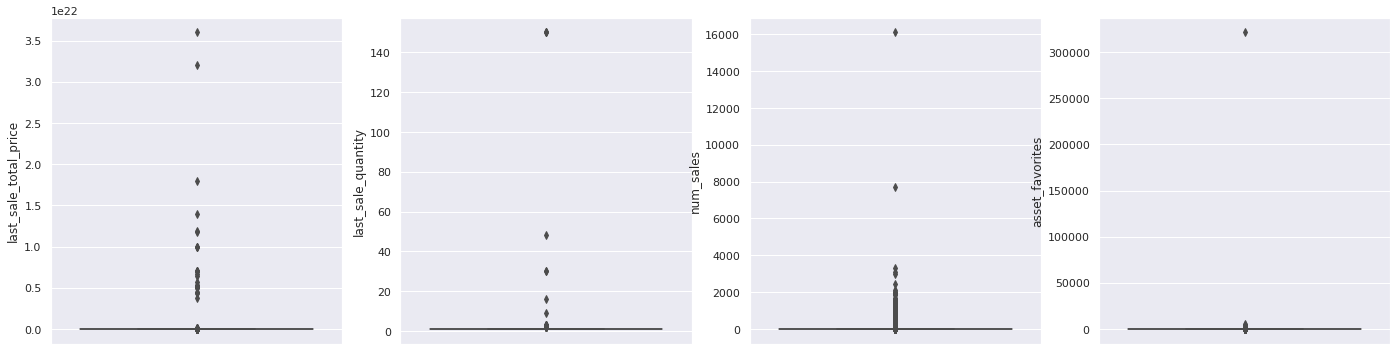

In [ ]:
outliers = ['last_sale_total_price', 'last_sale_quantity', 'num_sales', 'asset_favorites']
visualize_outliers(assets, outliers)

In [ ]:
from scipy import stats
def remove_outlier(df, colname:str):
  return df[(np.abs(stats.zscore(df[colname])) < 2)]

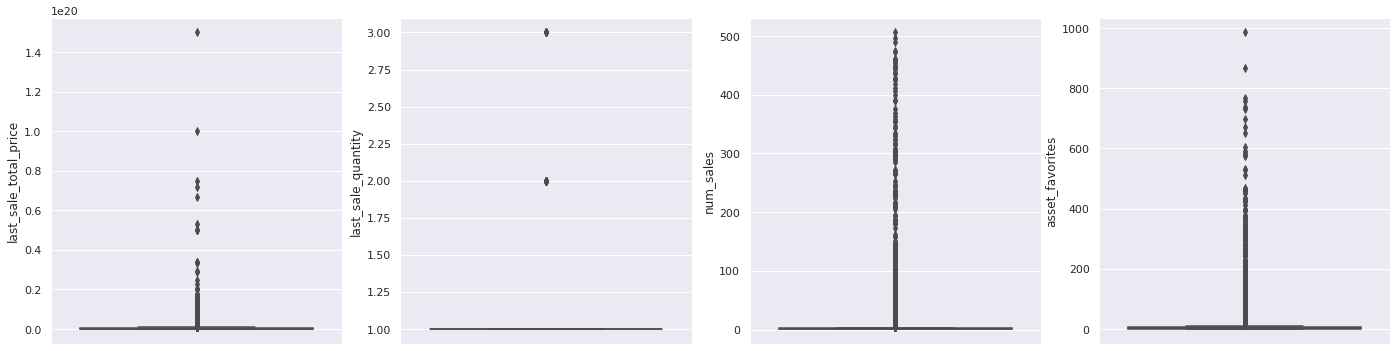

In [ ]:
for outlier in outliers:
  assets = remove_outlier(assets, outlier)
visualize_outliers(assets, outliers)

## EDA

In [ ]:
collections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stats_one_day_volume            1399 non-null   float64
 1   stats_one_day_change            1399 non-null   float64
 2   stats_one_day_sales             1399 non-null   int64  
 3   stats_one_day_average_price     1399 non-null   float64
 4   stats_seven_day_volume          1399 non-null   float64
 5   stats_seven_day_change          1399 non-null   float64
 6   stats_seven_day_sales           1399 non-null   int64  
 7   stats_seven_day_average_price   1399 non-null   float64
 8   stats_thirty_day_volume         1399 non-null   float64
 9   stats_thirty_day_change         1399 non-null   float64
 10  stats_thirty_day_sales          1399 non-null   int64  
 11  stats_thirty_day_average_price  1399 non-null   float64
 12  stats_total_volume              13

### NFT Transactions

In [ ]:
assets['created_year'] = assets['asset_contract_created_date'].dt.year

In [ ]:
assets.sort_values('num_sales', ascending=False)[['collection_slug','token_id','name','asset_category','created_year','num_sales']].head(10)

,collection_slug,token_id,name,asset_category,created_year,num_sales
12755,bloodshedbearsgenesismetapass,0,BloodShed Bears Genesis MetaPass,collectibles,2022,506.0
15842,town-star,174905136597362370220174548219928860688384,Haunted West Wing,virtual-worlds,2020,496.0
12740,opendao-genesis-membership,1,OpenDAO Genesis Membership Tier 2,collectibles,2022,489.0
8761,town-star,24500330418307569369362971735087311224832,Simplex Sugarcane,virtual-worlds,2020,474.0
11089,parallelalpha,10309,Jury-Rigged Juggernaut,trading-cards,2021,472.0
11137,parallelalpha,10355,Life Stream [SE],trading-cards,2021,461.0
12923,illuvium,2,Dawnlight Badge - Silver,collectibles,2021,461.0
10902,phto-all-access-pass,0,Access Pass,photography,2022,456.0
11136,parallelalpha,10317,Doctor's Assistant [SE],trading-cards,2021,455.0
10955,parallelalpha,10395,"Magna, Tempest's Will",trading-cards,2021,451.0


In [ ]:
for cat in assets['asset_category'].unique():
  selected = assets[assets['asset_category']==cat]
  display(selected.sort_values('num_sales', ascending=False)[['collection_slug','token_id','name','asset_category','num_sales','created_year']].head(10))

,collection_slug,token_id,name,asset_category,num_sales,created_year
12423,reli3f-ukr,26,ONEDAY//,art,224.0,2022
12171,reli3f-ukr,22,Sending Love,art,182.0,2022
12110,reli3f-ukr,28,untitled emotions,art,161.0,2022
12136,mazkedvillains,6881789134500883098746136898135726887682667869...,MAZKED VILLAINS #H01 - HENCHMEN I,art,127.0,2020
12219,reli3f-ukr,29,Give Me Your Huddled Masses Yearning to Breath...,art,125.0,2022
12306,rude-boys,10144,99 HYBRID (RUDE BOY'S),art,125.0,2021
11901,reli3f-ukr,12,Hoping for Peace,art,115.0,2022
12006,lifeofmon,1,#01 Peace,art,103.0,2022
11853,nftboxes,100003,NFTBoxes - Used March 2021 Ticket,art,71.0,2021
11531,findbalance,2,xi,art,67.0,2022


,collection_slug,token_id,name,asset_category,num_sales,created_year
10902,phto-all-access-pass,0,Access Pass,photography,456.0,2022
10813,cath-simard-editions,1,Trillion Star Hotel,photography,425.0,2021
10741,-impermanence-,1,Connection 連関,photography,61.0,2022
10762,phto-curated-collection,5,Jay-Z by Pat Johnson - Curated Collection – Lu...,photography,48.0,2022
10808,kevindyor,1,A SHOE,photography,46.0,2022
10772,trustdk,2012024352692631168351974543531674232982746847...,Surrender,photography,44.0,2020
10824,lorigraceeditions,9520443168064918160152873857885145389668856443...,The Six Year Strike,photography,44.0,2020
4840,gabs-beach-club,4428639252052241890899344300610526311986023803...,#1: Cosmopolitan,photography,40.0,2020
10816,astroinkweaver,7426531471770902049973199550206453371417856112...,The Hunter's Blade,photography,39.0,2020
9095,the-lonely-astronaut,6553538398477283521787132424262092300876842836...,Diminished,photography,29.0,2020


,collection_slug,token_id,name,asset_category,num_sales,created_year
11089,parallelalpha,10309,Jury-Rigged Juggernaut,trading-cards,472.0,2021
11137,parallelalpha,10355,Life Stream [SE],trading-cards,461.0,2021
11136,parallelalpha,10317,Doctor's Assistant [SE],trading-cards,455.0,2021
10955,parallelalpha,10395,"Magna, Tempest's Will",trading-cards,451.0,2021
11022,parallelalpha,10343,Honored Steward [SE],trading-cards,447.0,2021
11195,parallelalpha,10341,Fanatical Crewman [SE],trading-cards,447.0,2021
11147,curiocardswrapper,16,OriginalCoin,trading-cards,447.0,2021
11174,parallelalpha,10323,Hydrolist Chamber [SE],trading-cards,444.0,2021
11072,parallelalpha,10365,Memento of the Fallen,trading-cards,436.0,2021
11071,parallelalpha,10337,Unstable Drone [SE],trading-cards,427.0,2021


,collection_slug,token_id,name,asset_category,num_sales,created_year
15842,town-star,174905136597362370220174548219928860688384,Haunted West Wing,virtual-worlds,496.0,2020
8761,town-star,24500330418307569369362971735087311224832,Simplex Sugarcane,virtual-worlds,474.0,2020
15804,the-sandbox-assets,5546465704496319681695058728903542806456832097...,Alpha Dragon,virtual-worlds,445.0,2021
2102,town-star,104466686644728108283256004481552840916992,Wheat Stand,virtual-worlds,438.0,2020
15862,illuvium,11,Atlas Pwease Emote - Genesis Promo,virtual-worlds,428.0,2021
15868,illuvium,10,Death Stare Blazenite Emote - Genesis Promo,virtual-worlds,375.0,2021
8764,the-sandbox-assets,5546465704496319681695058728903542806456832097...,Snoopverse Early Access Pass,virtual-worlds,369.0,2021
15730,town-star,200086031749511816516464269169879708336128,Galaverse Live Pass,virtual-worlds,353.0,2020
15646,town-star,105827816112411862137109502911279913762816,Rare Water Tower,virtual-worlds,330.0,2020
15818,the-sandbox-assets,5546465704496319681695058728903542806456832097...,Alpha Sword,virtual-worlds,316.0,2021


,collection_slug,token_id,name,asset_category,num_sales,created_year
2249,revv-motorsport,2070523904197902172542171952992077818653343999...,CG REVV Racer,sports,101.0,2021
1548,cryptodunks,7566644265404839042643503480024185674343305554...,"GAMEYHEN LIL'BIRD - Based Common, #/100 LE",sports,84.0,2020
14655,cryptodunks,7566644265404839042643503480024185674343305554...,"JOE MERMANT - Based Common, #/50 LE",sports,46.0,2020
14443,cryptodunks,7566644265404839042643503480024185674343305554...,"IMMACULATE QUACKLEY - Based Common, #/100+ CC",sports,44.0,2020
14295,cryptodunks,7566644265404839042643503480024185674343305554...,"FRIEND FLAN FEET - Based, Common #/100+ CC",sports,39.0,2020
14366,etherjam,7419107737388539235772899949888675722363877374...,The Worm,sports,20.0,2020
4602,etherjam,7419107737388539235772899949888675722363877374...,King,sports,11.0,2020
14698,lympo-genesis,8,Sergej Maslobojev,sports,11.0,2021
14676,yugioh-nft-s,6444685627370334962133018447594323002761096209...,Blockchain Apes,sports,11.0,2020
14665,gridirongoofs,1156704949478449015664633515641050478259455593...,O'Doyle Beckman Sr. - Rare - */25,sports,8.0,2020


,collection_slug,token_id,name,asset_category,num_sales,created_year
12755,bloodshedbearsgenesismetapass,0,BloodShed Bears Genesis MetaPass,collectibles,506.0,2022
12740,opendao-genesis-membership,1,OpenDAO Genesis Membership Tier 2,collectibles,489.0,2022
12923,illuvium,2,Dawnlight Badge - Silver,collectibles,461.0,2021
13757,mirandus,38111625095145107907897956032358039683072,Tavern,collectibles,406.0,2020
13366,boss-beauties-collabs,1,Boss Beauties x Rolling Stone,collectibles,358.0,2022
12958,mirandus,109570922148542185235206623593029364088832,Human Exemplar: Rider of the North,collectibles,304.0,2020
12534,mirandus,120459957890012216066034611030845946855424,Human Exemplar: The Goldsmith,collectibles,303.0,2020
9621,zapper-season-2,21,"Chad, the Yield Farmer (Gold)",collectibles,301.0,2021
13082,mirandus,37771342728224169444434581424926271471616,Simple Forge,collectibles,298.0,2020
13588,opendao-genesis-membership,0,OpenDAO Genesis Membership Tier 1,collectibles,286.0,2022


,collection_slug,token_id,name,asset_category,num_sales,created_year
13823,ens,1000961525578127385654927565115844780934461247...,voxi.eth,domain-names,3.0,2019
14202,ens,4717204161879673203189907316261172996030984753...,eminemcarhartt.eth,domain-names,3.0,2019
14242,ens,8833138973283939702491896830451816335522029576...,milf.eth,domain-names,3.0,2019
14100,ens,6723054108537116335634110198221162553263056257...,revolt.eth,domain-names,3.0,2019
14136,ens,4714931899550176122303082906384673406626222044...,stipulate.eth,domain-names,3.0,2019
14008,ens,1021540721801383284872549003794104410250083222...,anon.eth,domain-names,3.0,2019
13806,unstoppable-domains-animals,9873374932762534782889173125754748938118164689...,onebirdie.crypto,domain-names,3.0,2019
13889,unstoppable-domains-animals,6816712944198531927118057391642604065921118137...,equalcheetah.crypto,domain-names,3.0,2019
13836,ens,1053149856070352427771153549091047333917260518...,penis.eth,domain-names,3.0,2019
14210,ens,2965130536791123903189551315829924216966044272...,darnel.eth,domain-names,3.0,2019


,collection_slug,token_id,name,asset_category,num_sales,created_year
15400,gcf-gala-games,4,Gala Genesis Curry Flow: Warp,utility,335.0,2021
15087,alpha-access-collection,8872957090444230670012851359618722236347921538...,Alpha Access Membership Pass,utility,307.0,2020
10468,fantasy-islands-sandbox,6926872185151885120347735097366127901084202063...,Green Glow Speedboat,utility,299.0,2021
15155,fantasy-islands-sandbox,6926872185151885120347735097366127901084202063...,Speed Demon Jet Ski,utility,295.0,2021
8211,playacards,6753427201714793776928301268620103234041293493...,THE PLAYACARD - Silver Edition,utility,271.0,2020
15628,whale-watchers,7388738470173609545258122175941514902404262148...,Captain's Club Boarding Pass,utility,267.0,2020
15141,spookeys,1,Bronze SpooKey,utility,214.0,2021
10368,thecivs,1115530789221331610212620551747347820308661923...,Elite Emerald 2000,utility,210.0,2020
14981,diamond-nft-supercommunity,7733681649965013466175367955038563897330995114...,Diamond 💎NFT💎 Access Key,utility,209.0,2020
15600,meta-organization,0,Meta Organization – Access Card,utility,186.0,2021


,collection_slug,token_id,name,asset_category,num_sales,created_year
4038,usscsosirisonepatents,4093867389184081963454834722419751402109922379...,EARLY HOLD #1,science&technology,23.0,2020
6387,usscsosirisonepatents,4093867389184081963454834722419751402109922379...,EARLY HOLD #10,science&technology,4.0,2020
6420,usscsosirisonepatents,4093867389184081963454834722419751402109922379...,EARLY HOLD #9,science&technology,4.0,2020
6418,usscsosirisonepatents,4093867389184081963454834722419751402109922379...,REGULAR HOLD #1,science&technology,4.0,2020
10612,usscsosirisonepatents,4093867389184081963454834722419751402109922379...,EARLY HOLD #4,science&technology,4.0,2020
4052,usscsosirisonepatents,4093867389184081963454834722419751402109922379...,EARLY HOLD #7,science&technology,3.0,2020
4016,usscsosirisonepatents,4093867389184081963454834722419751402109922379...,EARLY HOLD #2,science&technology,3.0,2020
4015,peltzer-patent-drawings,8696897598415459563220917650739844776945566570...,Pneumatic Hammer: “Hammer Helper”,science&technology,2.0,2020
6382,emergent-biological-events,8585919186663880836533143787495322896678581947...,Biological Revelation 22,science&technology,2.0,2020
8268,emergent-biological-events,8585919186663880836533143787495322896678581947...,Biological Revelation 59,science&technology,2.0,2020


,collection_slug,token_id,name,asset_category,num_sales,created_year
11307,async-music,1700002,The Song of Nine Paths Silver Blank,music,418.0,2021
11446,dyl,7146770743131149615071280686591724871364217237...,Crypto Rich Deluxe Trading Card (Standard),music,412.0,2020
11463,snoopdoggbodr,239899068679261616741679098239396589076480,Snoop's Stash Box,music,235.0,2020
11516,mola-chill-club-1,5693016353386119393517169975620985482236829304...,Genesis Pass,music,145.0,2020
11399,mola-chill-club-1,5693016353386119393517169975620985482236829304...,Genesis Pass.,music,131.0,2020
11341,country-punks-polygon,8505797091389612485719858897011632169349754393...,Poke Apes,music,35.0,2020
11468,country-punks-polygon,8505797091389612485719858897011632169349754393...,Nations Apes,music,22.0,2020
11503,harmony-nft,3292886012983862404843991279439907728674075256...,Third Eye,music,17.0,2020
11372,country-punks-polygon,8505797091389612485719858897011632169349754393...,Blockchain Apes,music,17.0,2020
11333,country-punks-polygon,8505797091389612485719858897011632169349754393...,Sports Fan Apes,music,15.0,2020


In [ ]:
for slug in assets['collection_slug'].unique()[:10]:
  selected = assets[assets['collection_slug']==slug]
  display(selected.sort_values('num_sales', ascending=False)[['collection_slug','token_id','name','asset_category','num_sales','created_year']].head(10))
  

,collection_slug,token_id,name,asset_category,num_sales,created_year
855,whaletogether,7150,AlphieWhale #7150,art,2.0,2022
11655,whaletogether,6583,AlphieWhale #6583,art,2.0,2022
11857,whaletogether,4528,AlphieWhale #4528,art,2.0,2022
12293,whaletogether,7094,AlphieWhale #7094,art,2.0,2022
4,whaletogether,6996,AlphieWhale #6996,art,1.0,2022
658,whaletogether,6998,AlphieWhale #6998,art,1.0,2022
887,whaletogether,6616,AlphieWhale #6616,art,1.0,2022
1166,whaletogether,7297,AlphieWhale #7297,art,1.0,2022
1211,whaletogether,5696,AlphieWhale #5696,art,1.0,2022
1217,whaletogether,5452,AlphieWhale #5452,art,1.0,2022


,collection_slug,token_id,name,asset_category,num_sales,created_year
4254,dippies,7865,Dippie,art,6.0,2022
11719,dippies,6200,Dippie,art,5.0,2022
4136,dippies,7878,Dippie,art,5.0,2022
12309,dippies,6540,Dippie #6540,art,5.0,2022
6507,dippies,3903,Dippie #3903,art,5.0,2022
12283,dippies,1803,Dippie #1803,art,5.0,2022
11574,dippies,3202,Dippie,art,5.0,2022
12193,dippies,2366,Dippie,art,5.0,2022
1880,dippies,1554,Dippie,art,4.0,2022
1136,dippies,7481,Dippie,art,4.0,2022


,collection_slug,token_id,name,asset_category,num_sales,created_year
12389,pixels-farm,1438,Farm Land #1438,art,4.0,2022
474,pixels-farm,4567,Farm Land #4567,art,3.0,2022
834,pixels-farm,2766,Farm Land #2766,art,3.0,2022
12456,pixels-farm,2586,Farm Land #2586,art,3.0,2022
13,pixels-farm,2034,Farm Land #2034,art,2.0,2022


,collection_slug,token_id,name,asset_category,num_sales,created_year
55,physarum-series,5192973494641134628954079063576509506036312503...,Physarum #040,art,4.0,2020
25,physarum-series,5192973494641134628954079063576509506036312503...,Physarum #043,art,3.0,2020


,collection_slug,token_id,name,asset_category,num_sales,created_year
30,pixel-glass-by-kai,24000037,Pixel Glass #37,art,2.0,2020


,collection_slug,token_id,name,asset_category,num_sales,created_year
49,byteosaurus,3408548560580985823464505673624610083362790836...,Byteosaurus #1915,art,2.0,2020


,collection_slug,token_id,name,asset_category,num_sales,created_year
60,into-the-cryptoverse-nfts,8579725283849045591357590181114250118129068479...,Bullish With A Couple Panda Bears,art,39.0,2020


,collection_slug,token_id,name,asset_category,num_sales,created_year
66,wonderpals,1495,WonderPal #1495,art,4.0,2022
12322,wonderpals,4833,WonderPal #4833,art,4.0,2022
12372,wonderpals,8619,WonderPal #8619,art,3.0,2022
12170,wonderpals,9512,WonderPal #9512,art,3.0,2022
12150,wonderpals,7278,WonderPal #7278,art,3.0,2022
12137,wonderpals,4522,WonderPal #4522,art,3.0,2022
11966,wonderpals,6060,WonderPal #6060,art,3.0,2022
11881,wonderpals,2523,WonderPal #2523,art,3.0,2022
11696,wonderpals,2758,WonderPal #2758,art,3.0,2022
11713,wonderpals,5505,WonderPal #5505,art,2.0,2022


,collection_slug,token_id,name,asset_category,num_sales,created_year
1006,cryptocoven,1401,"europium, the covert nightmare",art,3.0,2021
116,cryptocoven,2266,morganite the glittering,art,2.0,2021
974,cryptocoven,4940,diamond timpani,art,2.0,2021
719,cryptocoven,1663,"radicchio, the fragrant pancake",art,1.0,2021


,collection_slug,token_id,name,asset_category,num_sales,created_year
11907,loot-explorer,6271,Phanir Boldur,art,3.0,2021
129,loot-explorer,4098,Someryll Olymar,art,2.0,2021
12403,loot-explorer,4888,Beldor Qelmir,art,2.0,2021


In [ ]:
for year in assets['created_year'].unique():
  selected = assets[assets['created_year']==year]
  display(selected.sort_values('num_sales', ascending=False)[['collection_slug','token_id','name','asset_category','num_sales','created_year']].head(10))

,collection_slug,token_id,name,asset_category,num_sales,created_year
12755,bloodshedbearsgenesismetapass,0,BloodShed Bears Genesis MetaPass,collectibles,506.0,2022
12740,opendao-genesis-membership,1,OpenDAO Genesis Membership Tier 2,collectibles,489.0,2022
10902,phto-all-access-pass,0,Access Pass,photography,456.0,2022
13366,boss-beauties-collabs,1,Boss Beauties x Rolling Stone,collectibles,358.0,2022
13588,opendao-genesis-membership,0,OpenDAO Genesis Membership Tier 1,collectibles,286.0,2022
12423,reli3f-ukr,26,ONEDAY//,art,224.0,2022
12171,reli3f-ukr,22,Sending Love,art,182.0,2022
12110,reli3f-ukr,28,untitled emotions,art,161.0,2022
10962,arbo-artifacts,35,Source Key,trading-cards,146.0,2022
13669,superlativemagiclaboratory,2,Magic Herb,collectibles,135.0,2022


,collection_slug,token_id,name,asset_category,num_sales,created_year
15842,town-star,174905136597362370220174548219928860688384,Haunted West Wing,virtual-worlds,496.0,2020
8761,town-star,24500330418307569369362971735087311224832,Simplex Sugarcane,virtual-worlds,474.0,2020
2102,town-star,104466686644728108283256004481552840916992,Wheat Stand,virtual-worlds,438.0,2020
11446,dyl,7146770743131149615071280686591724871364217237...,Crypto Rich Deluxe Trading Card (Standard),music,412.0,2020
13757,mirandus,38111625095145107907897956032358039683072,Tavern,collectibles,406.0,2020
15730,town-star,200086031749511816516464269169879708336128,Galaverse Live Pass,virtual-worlds,353.0,2020
15646,town-star,105827816112411862137109502911279913762816,Rare Water Tower,virtual-worlds,330.0,2020
15719,town-star,217100150095558739689632999541468118908928,Enterprise Deed (Uncommon),virtual-worlds,308.0,2020
15087,alpha-access-collection,8872957090444230670012851359618722236347921538...,Alpha Access Membership Pass,utility,307.0,2020
15849,town-star,229350315304712524374314485409011774521344,Rare Basketball Court,virtual-worlds,306.0,2020


,collection_slug,token_id,name,asset_category,num_sales,created_year
11089,parallelalpha,10309,Jury-Rigged Juggernaut,trading-cards,472.0,2021
12923,illuvium,2,Dawnlight Badge - Silver,collectibles,461.0,2021
11137,parallelalpha,10355,Life Stream [SE],trading-cards,461.0,2021
11136,parallelalpha,10317,Doctor's Assistant [SE],trading-cards,455.0,2021
10955,parallelalpha,10395,"Magna, Tempest's Will",trading-cards,451.0,2021
11147,curiocardswrapper,16,OriginalCoin,trading-cards,447.0,2021
11022,parallelalpha,10343,Honored Steward [SE],trading-cards,447.0,2021
11195,parallelalpha,10341,Fanatical Crewman [SE],trading-cards,447.0,2021
15804,the-sandbox-assets,5546465704496319681695058728903542806456832097...,Alpha Dragon,virtual-worlds,445.0,2021
11174,parallelalpha,10323,Hydrolist Chamber [SE],trading-cards,444.0,2021


,collection_slug,token_id,name,asset_category,num_sales,created_year
1302,age-of-rust,5427754182999197176457652571067404467923921118...,Smoke Grenades,trading-cards,18.0,2019
4456,cryptovoxel-wearables,561,Chocolate Cream Donut,virtual-worlds,11.0,2019
15645,cryptovoxel-wearables,2984,Blue Jeans,virtual-worlds,5.0,2019
8768,somnium-space,7,Small #7 (S) parcel in Somnium Space,virtual-worlds,5.0,2019
13156,cryptoskulls,4623,CryptoSkull #4623 (Game Token),collectibles,4.0,2019
2278,sorare,8550331171664744146604681982027607588848913344...,Dylan De Belder 2019-20 • Rare 41/100,sports,4.0,2019
14048,ens,1856077682575310919997957241580041696217671495...,cannatribe.eth,domain-names,3.0,2019
13967,ens,2279328663371491724654723048914228697268971429...,lntel.eth,domain-names,3.0,2019
14100,ens,6723054108537116335634110198221162553263056257...,revolt.eth,domain-names,3.0,2019
14242,ens,8833138973283939702491896830451816335522029576...,milf.eth,domain-names,3.0,2019


,collection_slug,token_id,name,asset_category,num_sales,created_year
12236,cryptopunks,9768,CryptoPunk #9768,art,6.0,2018
11836,cryptopunks,4974,CryptoPunk #4974,art,5.0,2018
4473,decentraland,17694683079888800100095479586451946995618,"Parcel 51,-94",virtual-worlds,4.0,2018
15883,decentraland,1157920892373161954235709850086879078297905013...,In the Mix!,virtual-worlds,4.0,2018
2082,cryptovoxels,4499,19 Galleria Meravigli,virtual-worlds,4.0,2018
2134,cryptovoxels,1897,12 Rand Extension,virtual-worlds,4.0,2018
15691,decentraland,45257554800484815640628822788425172123650,1 Parcel from Main Road & 1 from District. Nea...,virtual-worlds,4.0,2018
15710,cryptovoxels,3775,12 Suginami Avenue,virtual-worlds,4.0,2018
4539,war-riders,1110651732814033792,SUV Kit,virtual-worlds,3.0,2018
8705,decentraland,1157920892373161954235709850086879078165194890...,"Parcel -109,-62",virtual-worlds,2.0,2018


### NFT Asset Category Comparison

In [ ]:
aggregate = {
    'last_sale_total_price': 'mean',
    'asset_favorites': 'sum',
    'num_sales': 'sum'
}
assets.groupby('asset_category')[['last_sale_total_price', 'asset_favorites', 'num_sales']].agg(aggregate).sort_values('num_sales', ascending=False)

,last_sale_total_price,asset_favorites,num_sales
asset_category,,,
trading-cards,3.537051e+17,17390,19116.0
virtual-worlds,2.241755e+18,34099,18483.0
collectibles,4.328438e+17,14116,9274.0
utility,4.190289e+17,7496,5913.0
art,5.634119e+17,6528,3746.0
music,4.013962e+17,3718,2174.0
photography,5.158187e+17,6023,1754.0
sports,1.970534e+17,2787,1259.0
domain-names,1.109343e+18,3279,629.0


### Fee Basis Points & Total Transactions vs. Total Price

In [ ]:
assets_sold = assets[assets['last_sale_created_date'].notna()]
assets_sold

,token_id,asset_contract_address,owner_address,collection_slug,last_sale_payment_token_id,last_sale_payment_token_symbol,last_sale_payment_token_address,last_sale_payment_token_name,last_sale_payment_token_eth_price,last_sale_payment_token_usd_price,...,num_sales,image_url,description,asset_contract_type,asset_contract_created_date,asset_contract_name,asset_contract_owner,asset_contract_dev_seller_fee_basis_points,asset_favorites,asset_category
4,6996,0x417737d49a175d62625154262d8569d3890425ae,0x02e49aaddeca1b6b27edd1f5f43b5ed3e2be12ce,whaletogether,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2657.88,...,1.0,https://lh3.googleusercontent.com/ndXzObLk0INB...,Alphie is the friendly alpha whale for the lit...,non-fungible,2022-02-02T08:11:36.815197,AlphieWhales,242350928.0,750.0,1,art
8,3400,0x82f5ef9ddc3d231962ba57a9c2ebb307dc8d26c2,0x84705de9c79c49c262817cf905c11d8c7f4ab3ef,dippies,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2657.88,...,3.0,https://lh3.googleusercontent.com/wj8tJt3nD-qL...,"Funk, meet web 3. A collection of 8,888 unique...",non-fungible,2022-03-02T13:41:02.605663,Dippies,265998027.0,500.0,1,art
9,7372,0x82f5ef9ddc3d231962ba57a9c2ebb307dc8d26c2,0x69a1d37f789f319ae1b458b125ba853de9fa712b,dippies,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2657.88,...,2.0,https://lh3.googleusercontent.com/IQpNjqw5OcCv...,"Funk, meet web 3. A collection of 8,888 unique...",non-fungible,2022-03-02T13:41:02.605663,Dippies,265998027.0,500.0,1,art
13,2034,0x5c1a0cc6dadf4d0fb31425461df35ba80fcbc110,0x41f96a5ea2edea578bd1cc5be5c070ee99df805c,pixels-farm,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2657.88,...,2.0,https://lh3.googleusercontent.com/AqFIxi4Emd8H...,NaN,non-fungible,2022-01-31T17:21:30.327073,Farm Land by Pixels,240449607.0,500.0,1,art
25,5192973494641134628954079063576509506036312503...,0x495f947276749ce646f68ac8c248420045cb7b5e,0x0000000000000000000000000000000000000000,physarum-series,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2657.88,...,3.0,https://lh3.googleusercontent.com/3Q51ymufPCVH...,Each Physarum is a 1/1 visualization of the pa...,semi-fungible,2020-12-02T17:40:53.232025,OpenSea Collection,102384.0,0.0,2,art
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16545,933,0xa1d4657e0e6507d5a94d06da93e94dc7c8c44b51,0x42f2d682d9cee89a98347768337938ed8d18c266,worldwidewebbland,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2630.00,...,3.0,https://lh3.googleusercontent.com/KfYh3rAmTt51...,NaN,non-fungible,2021-11-29T07:58:49.594994,WebbLand,149308361.0,500.0,8,virtual-worlds
16546,34890,0x5cc5b05a8a13e3fbdb0bb9fccd98d38e50f90c38,0x2537c37ec2ad1c35121ba978a2a3bdb5b47f0155,sandbox,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2630.00,...,1.0,https://lh3.googleusercontent.com/oU61eB5dseAh...,A LAND is a digital piece of real estate in Th...,non-fungible,2022-01-27T23:55:22.193843,Sandbox's LANDs,NaN,500.0,2,virtual-worlds
16547,3277,0xa1d4657e0e6507d5a94d06da93e94dc7c8c44b51,0x8caec6f15ccae3d4d2ed52b403cced20a644190a,worldwidewebbland,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2630.00,...,5.0,https://lh3.googleusercontent.com/KfYh3rAmTt51...,NaN,non-fungible,2021-11-29T07:58:49.594994,WebbLand,149308361.0,500.0,5,virtual-worlds
16548,5546465704496319681695058728903542806456832097...,0xa342f5d851e866e18ff98f351f2c6637f4478db5,0x0000000000000000000000000000000000000000,the-sandbox-assets,1.0,ETH,0x0000000000000000000000000000000000000000,Ether,1.0,2630.00,...,44.0,https://lh3.googleusercontent.com/27d2_wopusNC...,This cat is ready for an adventure in the anci...,semi-fungible,2021-01-16T12:45:09.229936,Sandbox's ASSETs,NaN,500.0,157,virtual-worlds


### Collections Comparison

In [ ]:
aggregate = {
    'stats_total_volume': 'mean',
    'stats_market_cap': 'mean',
    'stats_total_sales': 'mean',
    'stats_num_owners': 'sum',
    'stats_average_price': 'sum'
}
collections.groupby('slug')[['stats_total_volume', 'stats_market_cap', 'stats_total_sales', 'stats_num_owners', 'stats_average_price']].agg(aggregate).sort_values('stats_total_sales', ascending=False)

,stats_total_volume,stats_market_cap,stats_total_sales,stats_num_owners,stats_average_price
slug,,,,,
rarible,99786.207460,48844.215820,2.067212e+09,208416,0.000048
cryptokitties,70486.831040,42247.413720,7.800560e+05,114184,0.090361
sorare,50260.657230,50693.613330,4.379220e+05,17930,0.114771
town-star,31392.673800,82.806574,1.672600e+05,40564,0.187688
age-of-rust,168.526701,0.000000,1.653620e+05,1889,0.001019
...,...,...,...,...,...
us-patent-no-9750915-b2,0.000000,0.000000,0.000000e+00,1,0.000000
algorithm-nfts,0.000000,0.000000,0.000000e+00,1,0.000000
xdp-ai,0.000000,0.000000,0.000000e+00,1,0.000000


### Insights for investors & buyers

#### Best listing duration for auction

In [ ]:
events['duration'].describe()

count    4.029700e+04
mean     1.347688e+07
std      1.773864e+09
min      0.000000e+00
25%      8.649900e+04
50%      2.592640e+05
75%      6.048920e+05
max      2.517953e+11
Name: duration, dtype: float64

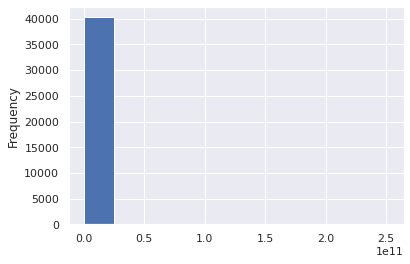

In [ ]:
events['duration'].plot(kind='hist')

In [ ]:
events['duration_range'] = pd.qcut(events['duration'], q=4, duplicates='drop')

In [ ]:
events['duration_range']

0        (259264.0, 604892.0]
1        (259264.0, 604892.0]
2        (259264.0, 604892.0]
3                         NaN
4                         NaN
                 ...         
87123                     NaN
87124                     NaN
87125                     NaN
87126                     NaN
87127                     NaN
Name: duration_range, Length: 84749, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 86499.0] < (86499.0, 259264.0] <
                                           (259264.0, 604892.0] < (604892.0, 251795344845.0]]

In [ ]:
events['duration_range'].cat.categories

IntervalIndex([(-0.001, 86499.0], (86499.0, 259264.0], (259264.0, 604892.0], (604892.0, 251795344845.0]], dtype='interval[float64, right]')

In [ ]:
events['duration_range'].value_counts()

(-0.001, 86499.0]             15247
(259264.0, 604892.0]          10415
(604892.0, 251795344845.0]     9731
(86499.0, 259264.0]            4904
Name: duration_range, dtype: int64

In [ ]:
duration_range = ['<= 1 day', '1-3 days', '3-7 days', '> 7 days']

In [ ]:
event_count_by_duration = pd.DataFrame({
    'duration_range' : duration_range
})

In [ ]:
event_counts = []
for duration_range in events['duration_range'].cat.categories:
  # Select events within the duration range
  selected = events.loc[events['duration_range']==duration_range]
  
  # Select slug and token_id for events in the duration range
  slug_tokenId = list(selected.groupby(['collection_slug','asset_token_id']).groups.keys())

  # Initialize event count to 0
  event_count = 0
  for slug, token_id in slug_tokenId:
    # Select events with specific slug and token_id
    sliced = events.loc[(events['collection_slug']==slug) & (events['asset_token_id']==token_id)]

    auction_date = selected.loc[(events['collection_slug']==slug) & (events['asset_token_id']==token_id)]['created_date'].min()

    # start_listing = sliced['listing_time'].apply(lambda x: x if x==min_list_time else datetime.min)
    filtered = sliced.loc[(sliced['event_type']!='created') & (sliced['created_date']>auction_date)]
    event_count += len(filtered)
  
  event_counts.append(event_count)

In [ ]:
event_count_by_duration['count'] = event_counts
event_count_by_duration

#### How popularity & total transactions affect an NFT price

In [ ]:
plt.scatter(assets['asset_favorites'],assets['last_sale_total_price'])

In [ ]:
plt.scatter(assets['asset_favorites'], assets['num_sales'])

In [ ]:
plt.scatter(assets['num_sales'], assets['last_sale_total_price'])

#### Statistics of tokens used for transactions

In [ ]:
assets_sale_count = assets['last_sale_payment_token_symbol'].value_counts()
assets_sale_count_df = pd.DataFrame({'token': assets_sale_count.index, 'count': assets_sale_count.values})
assets_sale_count_df.loc[2:,'token'] = "Others (GALA, MANA, ASH, USDC, DAI, SAND, REVV)"
assets_sale_count_df = assets_sale_count_df.groupby('token')['count'].sum()
assets_sale_count_df = pd.DataFrame({'token': assets_sale_count_df.index, 'count': assets_sale_count_df.values}).sort_values('count', ascending=False)

assets_sale_count_df

,token,count
0,ETH,7691
2,WETH,405
1,"Others (GALA, MANA, ASH, USDC, DAI, SAND, REVV)",97


### Exporting prepared datasets for Dashboard

In [ ]:
assets.to_csv('cleaned_assets.csv', index=False)
events.to_csv('cleaned_events.csv', index=False)
collections.to_csv('cleaned_collections.csv', index=False)

# Best listing duration df di export
event_count_by_duration.to_csv('best_listing.csv', index=False)